<a href="https://colab.research.google.com/github/rehann888/Loan_Default_Prediction_Model/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from google.colab import drive
from sklearn.naive_bayes import GaussianNB

In [ ]:
drive.mount('/content/drive')
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-653cd82774c8>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


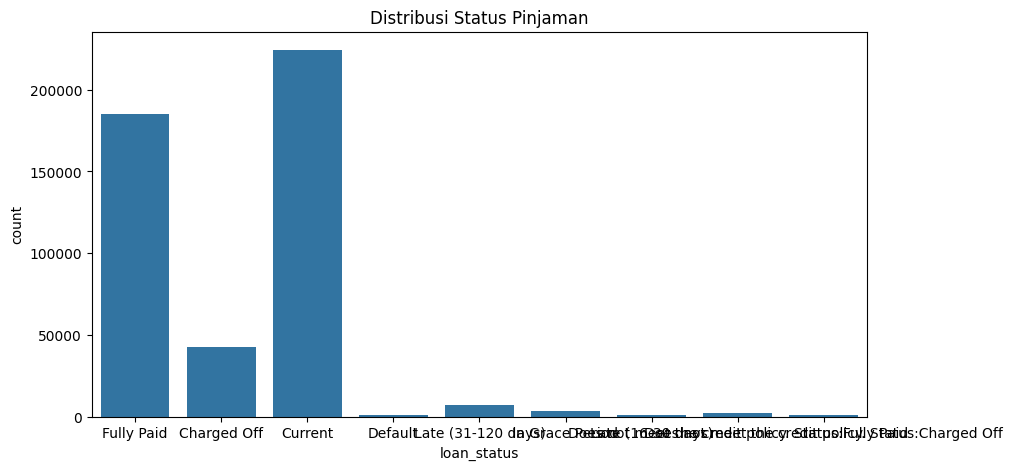

In [ ]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(10,5))
sns.countplot(x='loan_status', data=df)
plt.title('Distribusi Status Pinjaman')
plt.show()

In [ ]:
# Menampilkan informasi umum dari dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


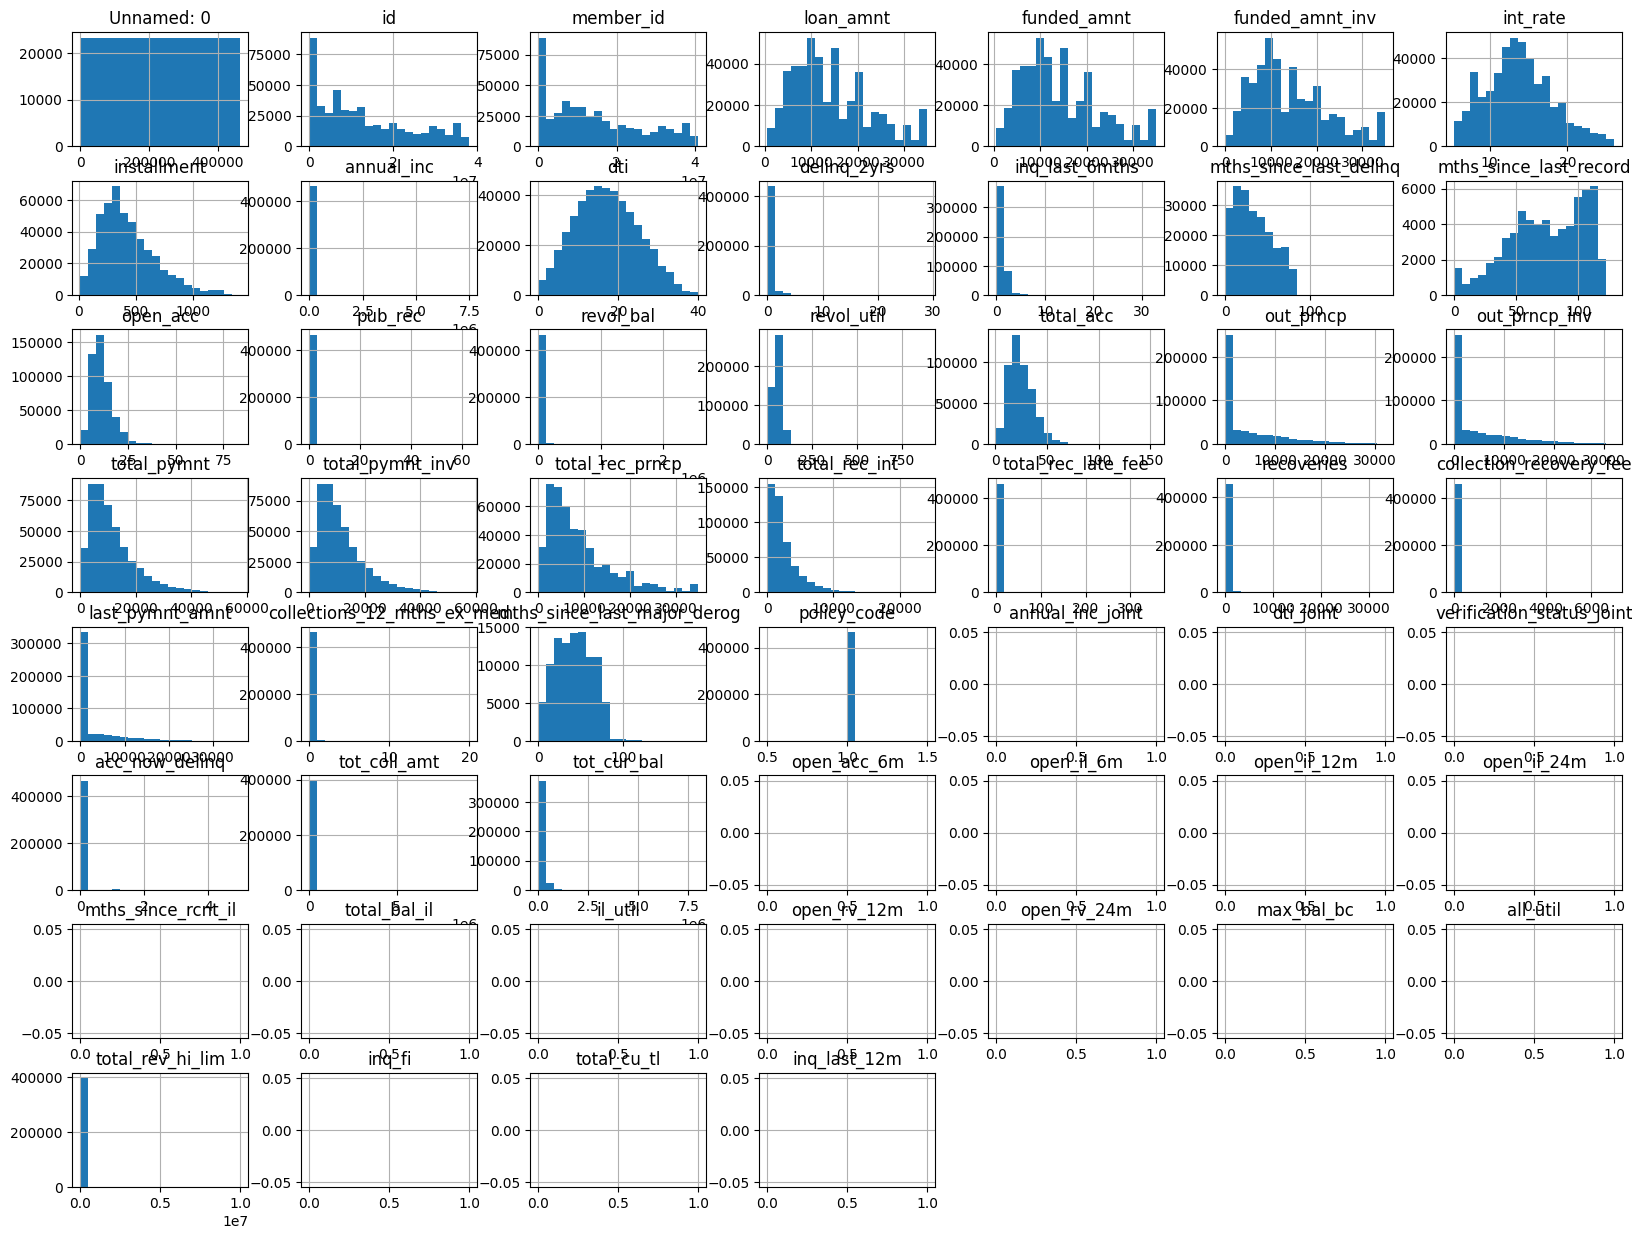

In [ ]:
# Visualisasi histogram untuk kolom numerik
df.hist(bins=20, figsize=(20,15))
plt.show()

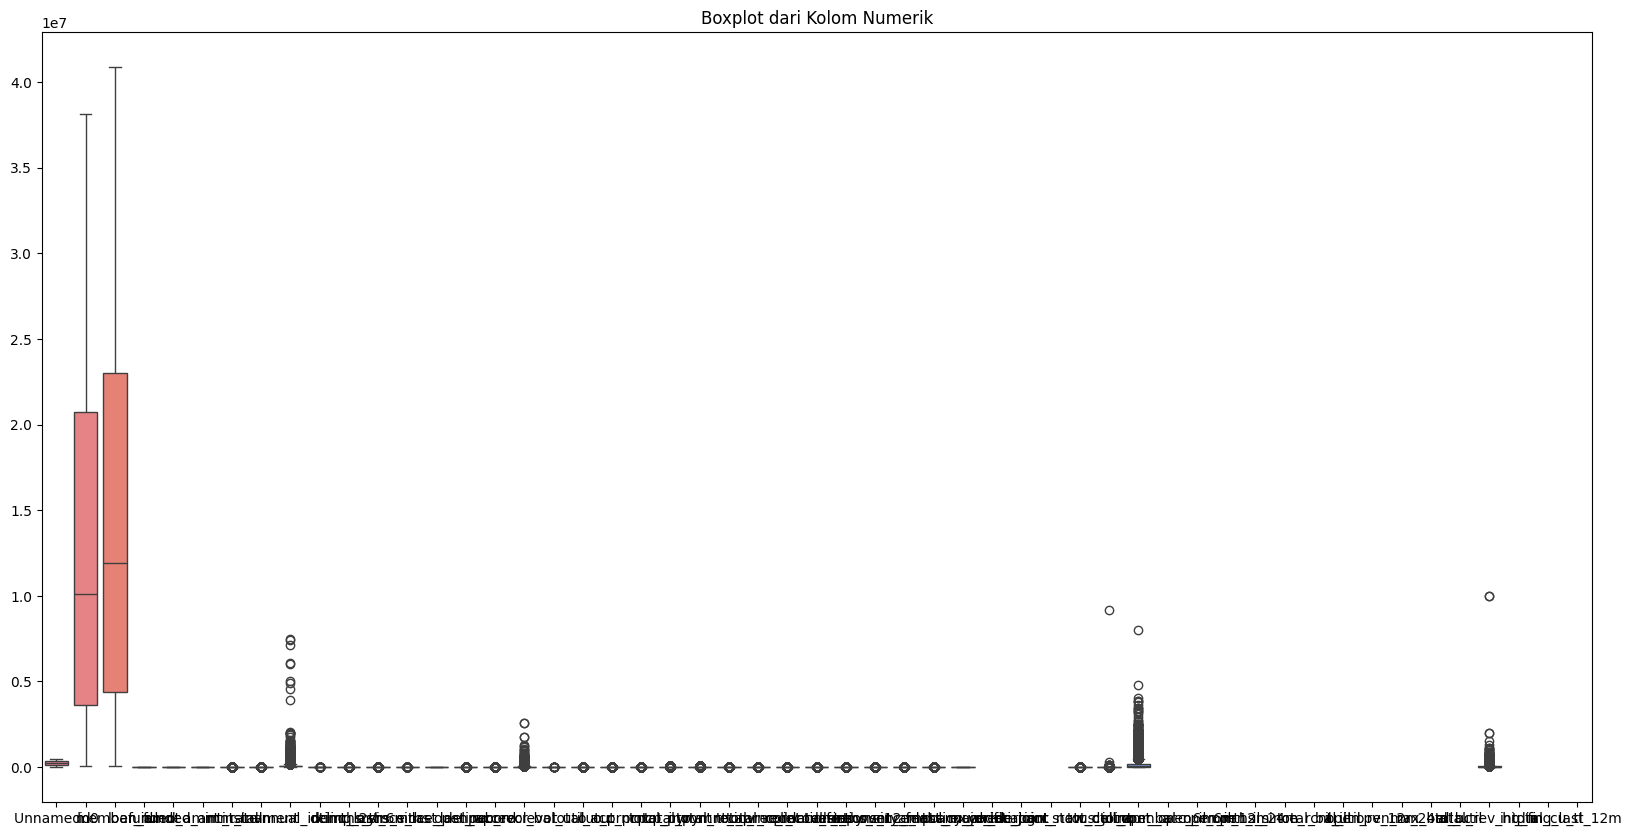

In [ ]:
# Visualisasi boxplot untuk kolom numerik
plt.figure(figsize=(20,10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot dari Kolom Numerik')
plt.show()

# DATA PREPARATION

In [ ]:
# List kolom yang ingin dihapus karena tidak relevan atau terlalu banyak missing values
columns_to_drop = [
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
    'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
    'inq_last_12m', 'id', 'member_id', 'url', 'desc', 'policy_code', 'next_pymnt_d'
]

# Menghapus kolom-kolom tersebut dari DataFrame
df = df.drop(columns=columns_to_drop)

In [ ]:
# Handling missing values
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

In [ ]:
# Mengisi missing values untuk kolom numerik dengan rata-rata
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
# Mengisi missing values untuk kolom non-numerik dengan nilai yang paling sering muncul (mode)
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

In [ ]:
# Menghapus baris yang memiliki missing values pada kolom target
df = df.dropna(subset=['loan_status'])

In [ ]:
# Mengkodekan variabel kategorikal menggunakan Label Encoding
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Simpan DataFrame yang telah diproses ke Google Drive
file_path = '/content/drive/MyDrive/processed_loan_data.csv'
df.to_csv(file_path, index=False)

# DATA MODELING

In [ ]:
# Memisahkan fitur dan label
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
# Membagi data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling fitur-fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Menggunakan Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Menggunakan SVM dengan kernel linear
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

# EVALUATION

In [ ]:
# Evaluasi Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluasi
y_pred_nb = nb_model.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test_scaled), multi_class='ovr')

In [ ]:
# Menampilkan hasil evaluasi
print("Evaluation Results:")
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("ROC AUC:", roc_auc_logistic)
print("\nNaiveBayes:")
print("Evaluation Results:")
print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("ROC AUC:", roc_auc_nb)

Evaluation Results:
Logistic Regression:
Accuracy: 0.9761626473079769
Precision: 0.9659503118768655
Recall: 0.9761626473079769
ROC AUC: 0.957866443858321

NaiveBayes:
Evaluation Results:
Naive Bayes:
Accuracy: 0.49919040929903385
Precision: 0.9393265601218703
Recall: 0.49919040929903385
ROC AUC: 0.9225390452969577
